## Regresion lineal


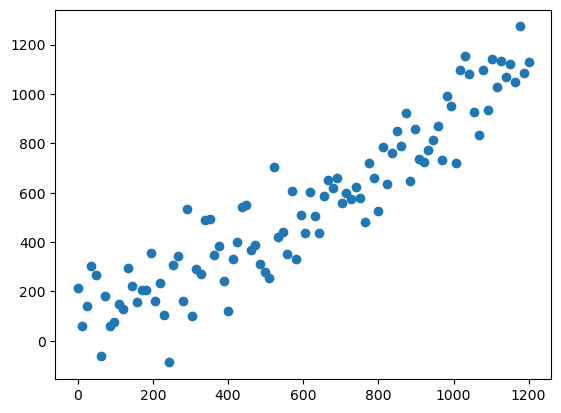

In [13]:
# Este código realiza una regresión lineal en un conjunto de datos y luego realiza un remuestreo con bootstrapping en los datos para encontrar un valor p para la pendiente de regresión.
# El código usa una función para realizar el remuestreo y la regresión.
# La función se llama en un bucle for para realizar 1000 remuestreos.
# Las pendientes de las nuevas muestras se trazan en un histograma.
# El valor p se calcula dividiendo el número de pendientes que son mayores que la pendiente real o menores que la pendiente real entre el número total de pendientes.
# El error estándar de la pendiente se calcula tomando la desviación estándar de las pendientes.
# El intervalo de confianza del 95% de la pendiente se calcula tomando los percentiles de las pendientes.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
np.random.seed(0)
num_samples = 100
x = np.linspace(0, 1200, num_samples)
sigma = 120
a = 0.7
b = 0.9
# probar con una distribución exponencial con lambda = 5
# en principio, incluso si el error no es normal, el método de bootstrapping
# debería funcionar
epsilon = np.random.normal(loc=0, scale=sigma, size=num_samples)
y = a + b * x + epsilon
plt.scatter(x, y)


In [14]:

# fit a simple linear regression model
model = LinearRegression()
# ajuster el modelo, con reshape(-1, 1) se ajusta a un array 2D de 1 columna
model.fit(x.reshape(-1, 1), y)
# model predict produce y_hat, y predica
residuales = y - model.predict(x.reshape(-1, 1))
# Define a function to perform bootstrap resampling and fit a regression model
def bootstrap_regression(data):
    # tomar muestra aleatoria de datos, con reemplazo
    # cada vez que se repita, rample será diferente
    sample = data.sample(frac=1, replace=True)
    # obtener X y Y
    X = sample[['x']]
    y = sample['y']
    # crear modelo de reg
    model = LinearRegression()
    # ajustar con X y y (de sample)
    model.fit(X, y)
    # retornar la pendiente
    return model.coef_[0]

# Resample the data and compute the p-value
data = pd.DataFrame({'x': x, 'y': y})
n_bootstraps = 1500 # 1500 repeticiones de bootstrap_regression
slopes = np.empty(n_bootstraps)
# correr n veces
for i in range(n_bootstraps):
    slopes[i] = bootstrap_regression(data)

# # obtain the null distribution of slopes, centered at 0
# null_slopes = slopes - np.mean(slopes)
# # calculate the p-value as the proportion of null slopes that are greater than or 
# # less than the actual slope, which we obtained with the original data
# p_value = (np.sum(null_slopes >= model.coef_[0]) + np.sum(null_slopes <= -model.coef_[0])) / len(null_slopes)

# beta_1_hat = result.x[1]
# se = np.std(slopes)
# print('Standard error of slope:', se.round(2))

# calculate the 95% confidence interval of the slope
ci = np.percentile(slopes, [2.5, 97.5])
print('95% confidence interval of slope:', ci.round(2))
# print('P-value of the slope:', p_value)

95% confidence interval of slope: [0.8  0.94]


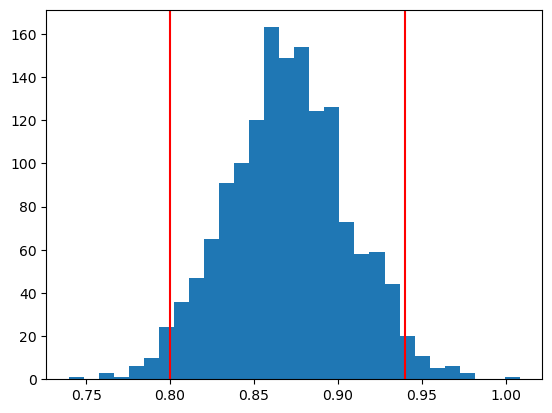

In [20]:
plt.hist(slopes, bins=30);
plt.axvline(ci.round(2)[0], c='r')
plt.axvline(ci.round(2)[1], c='r')